In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!/usr/bin/env python
# coding: utf-8


In [61]:
#For data processing
import pandas as pd
import numpy as np
import datetime as dt

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For models
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop, SGD, Adam
import preprocessing 
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [62]:
df =  pd.read_csv("data\stock.csv")

In [63]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
979,2017-12-22,914.650024,922.400024,909.299988,920.400024,906.417603,4872675
980,2017-12-26,924.849976,938.900024,918.150024,929.799988,915.674683,5301456
981,2017-12-27,933.000000,937.500000,919.000000,923.750000,909.716675,4352384
982,2017-12-28,925.250000,934.400024,919.099976,924.200012,910.159851,7091515
983,2017-12-29,926.500000,932.299988,918.500000,921.049988,907.057678,5069838


In [64]:
#creating test, train and validate trains
train_size = int(df.shape[0] * 0.80)
test_size = int(df.shape[0] * 0.20)

In [65]:
train_size

787

In [66]:
train_set = df.iloc[0:train_size, 1:2].values
test_set = df.iloc[train_size:, 1:2].values

In [67]:
print(train_set.shape, test_set.shape)

(787, 1) (197, 1)


In [68]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

In [69]:
#Creating a data structure with given time_steps (=5) and 1 output
# build the input features with time lag of 1 day (lag 1):

time_step = 5
X_train = []
y_train = []

for i in range(time_step, len(train_set)):
    X_train.append(train_set_scaled[i-time_step:i, 0])
    y_train.append(train_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)


(782, 5) (782,)


In [70]:
#reshape X_train to 3D array of dim sample size, time step, feature
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(782, 5, 1)


In [72]:
#build model

model = Sequential()

model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],(time_step-lag))))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output layer
model.add(Activation('relu'))

import time #helper libraries
start = time.time()
#opt = RMSprop(lr=0.01, momentum=0.0)
opt = RMSprop()
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
print ('compilation time : ', time.time() - start)

NameError: name 'lag' is not defined

In [45]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
25/25 [==============================] - 0s 7ms/step - loss: 0.0693
Epoch 2/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 3/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 4/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 5/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 6/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 7/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 8/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 9/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 10/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 11/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 12/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 13/15
25/25 [==============================

In [ ]:
model.summary()

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

TypeError: 'Sequential' object is not subscriptable

In [55]:
# Getting the predicted stock price of 
dataset_train = df.iloc[:round((train_size*0.65)), 1:2]
dataset_test = df.iloc[round((train_size*0.65)):, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

#input should also have the same time_step as the model
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step:].values

inputs.shape

(477, 1)

In [56]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_step, len(inputs)):
    X_test.append(inputs[(i-time_step):i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(472, 5, 1)


In [57]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [58]:
predicted_stock_price.shape

(472, 1)

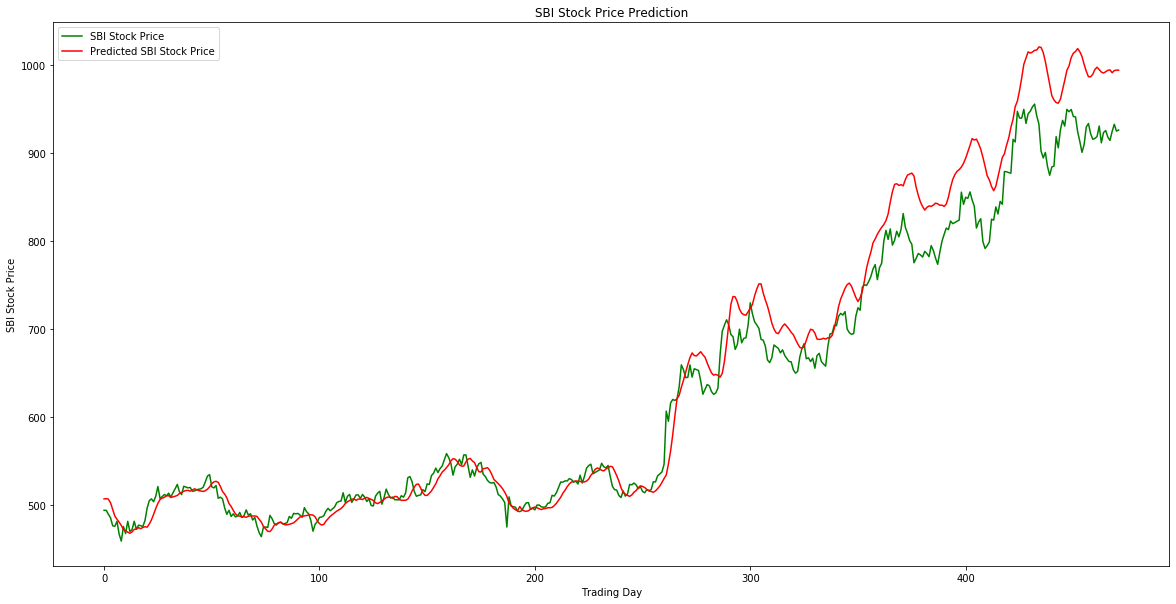

In [59]:
# Visualising the results

plt.figure(figsize=(20,10))
plt.plot(dataset_test.values, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
mae = mean_absolute_error(dataset_test.values, predicted_stock_price)
print('MAE: %f' % mae)


mse = mean_squared_error(dataset_test.values, predicted_stock_price)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

r2 = r2_score(dataset_test.values, predicted_stock_price)
print('R2: %f' % r2)

MAE: 20.087407
RMSE: 29.749354
R2: 0.960869
